##### Link: https://www.kaggle.com/uciml/mushroom-classification
##### Name: Beverly Hom
#### Class: CS 596 | Machine Learning


## Supervised Classification 
#### Algorithm 1: K-Nearest Neighbor
- Element classified by a majority vote of its nearest neighbors 
- Output is class membership 

#### Algorithm 2: Naive Bayes 
- Probabilistic classifier based on Bayes' theorem with strong naive independence assumptions between features
- Output is probability to class 

In [4]:
# Import libraries
import os
import pandas as pd # data frames
import numpy as np # numerical matrices
import matplotlib # plotting
import matplotlib.pyplot as plt
import sklearn # machine learning 
import caret # machine learning 
import seaborn as sns # plotting
sns.set(color_codes = True)


In [5]:
#Load in csv file

file = "/Users/beverly/mushroom_classification/mushrooms.csv"

# Read in csv files as pandas dataframes 
df = pd.read_csv(file)
#print(type(df))

In [209]:
# Get matrix dimensions
print("Data dimensions: {}".format(df.shape))

Data dimensions: (8124, 23)


## View Raw Categorical Data 

In [7]:
print("Data description:")

df.describe()

Data description:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# Look at the first 5 rows 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
# Convert categorical data to numerical data 

#from sklearn.feature_extraction import DictVectorizer 
#vector = DictVectorizer(sparse = False)
#dictionary = 
#data_matrix = 


In [10]:
# Convert dataframe to matrix
data_matrix = df.as_matrix()

#print(type(matrix))

In [210]:
# Counts of features 
#df.apply(pd.value_counts)

## Convert Categorical Data to Numerical Data

In [208]:
# Use label encoder to convert categorical labels to numerical labels

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
transformed_matrix = df.apply(label_encoder.fit_transform)

# View transformed matrix 
df.apply(label_encoder.fit_transform)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


## Dichotimize Classes by "Class" Column

In [13]:
# Dichotimize classes 
# e = ediible (0)
# p = poisonous (1)

# Edible class of mushrooms 
class0 = transformed_matrix.loc[transformed_matrix['class'] == 0]

# View class0 matrix 
class0.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3


In [14]:
# Poisonous class of mushrooms
class1 = transformed_matrix.loc[transformed_matrix['class'] == 1]

# View class1 matrix 
class1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
13,1,5,3,8,1,6,1,0,1,4,...,2,7,7,0,2,1,4,3,4,5
17,1,5,2,4,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,1


In [15]:
# Make figure sizes larger

# Get current figure size 
fig_size = plt.rcParams["figure.figsize"] 
# print("Current size: {}".format(fig_size)) 

# New figure size
fig_size[0] = 20 
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

## Pairwise Relationship of Features

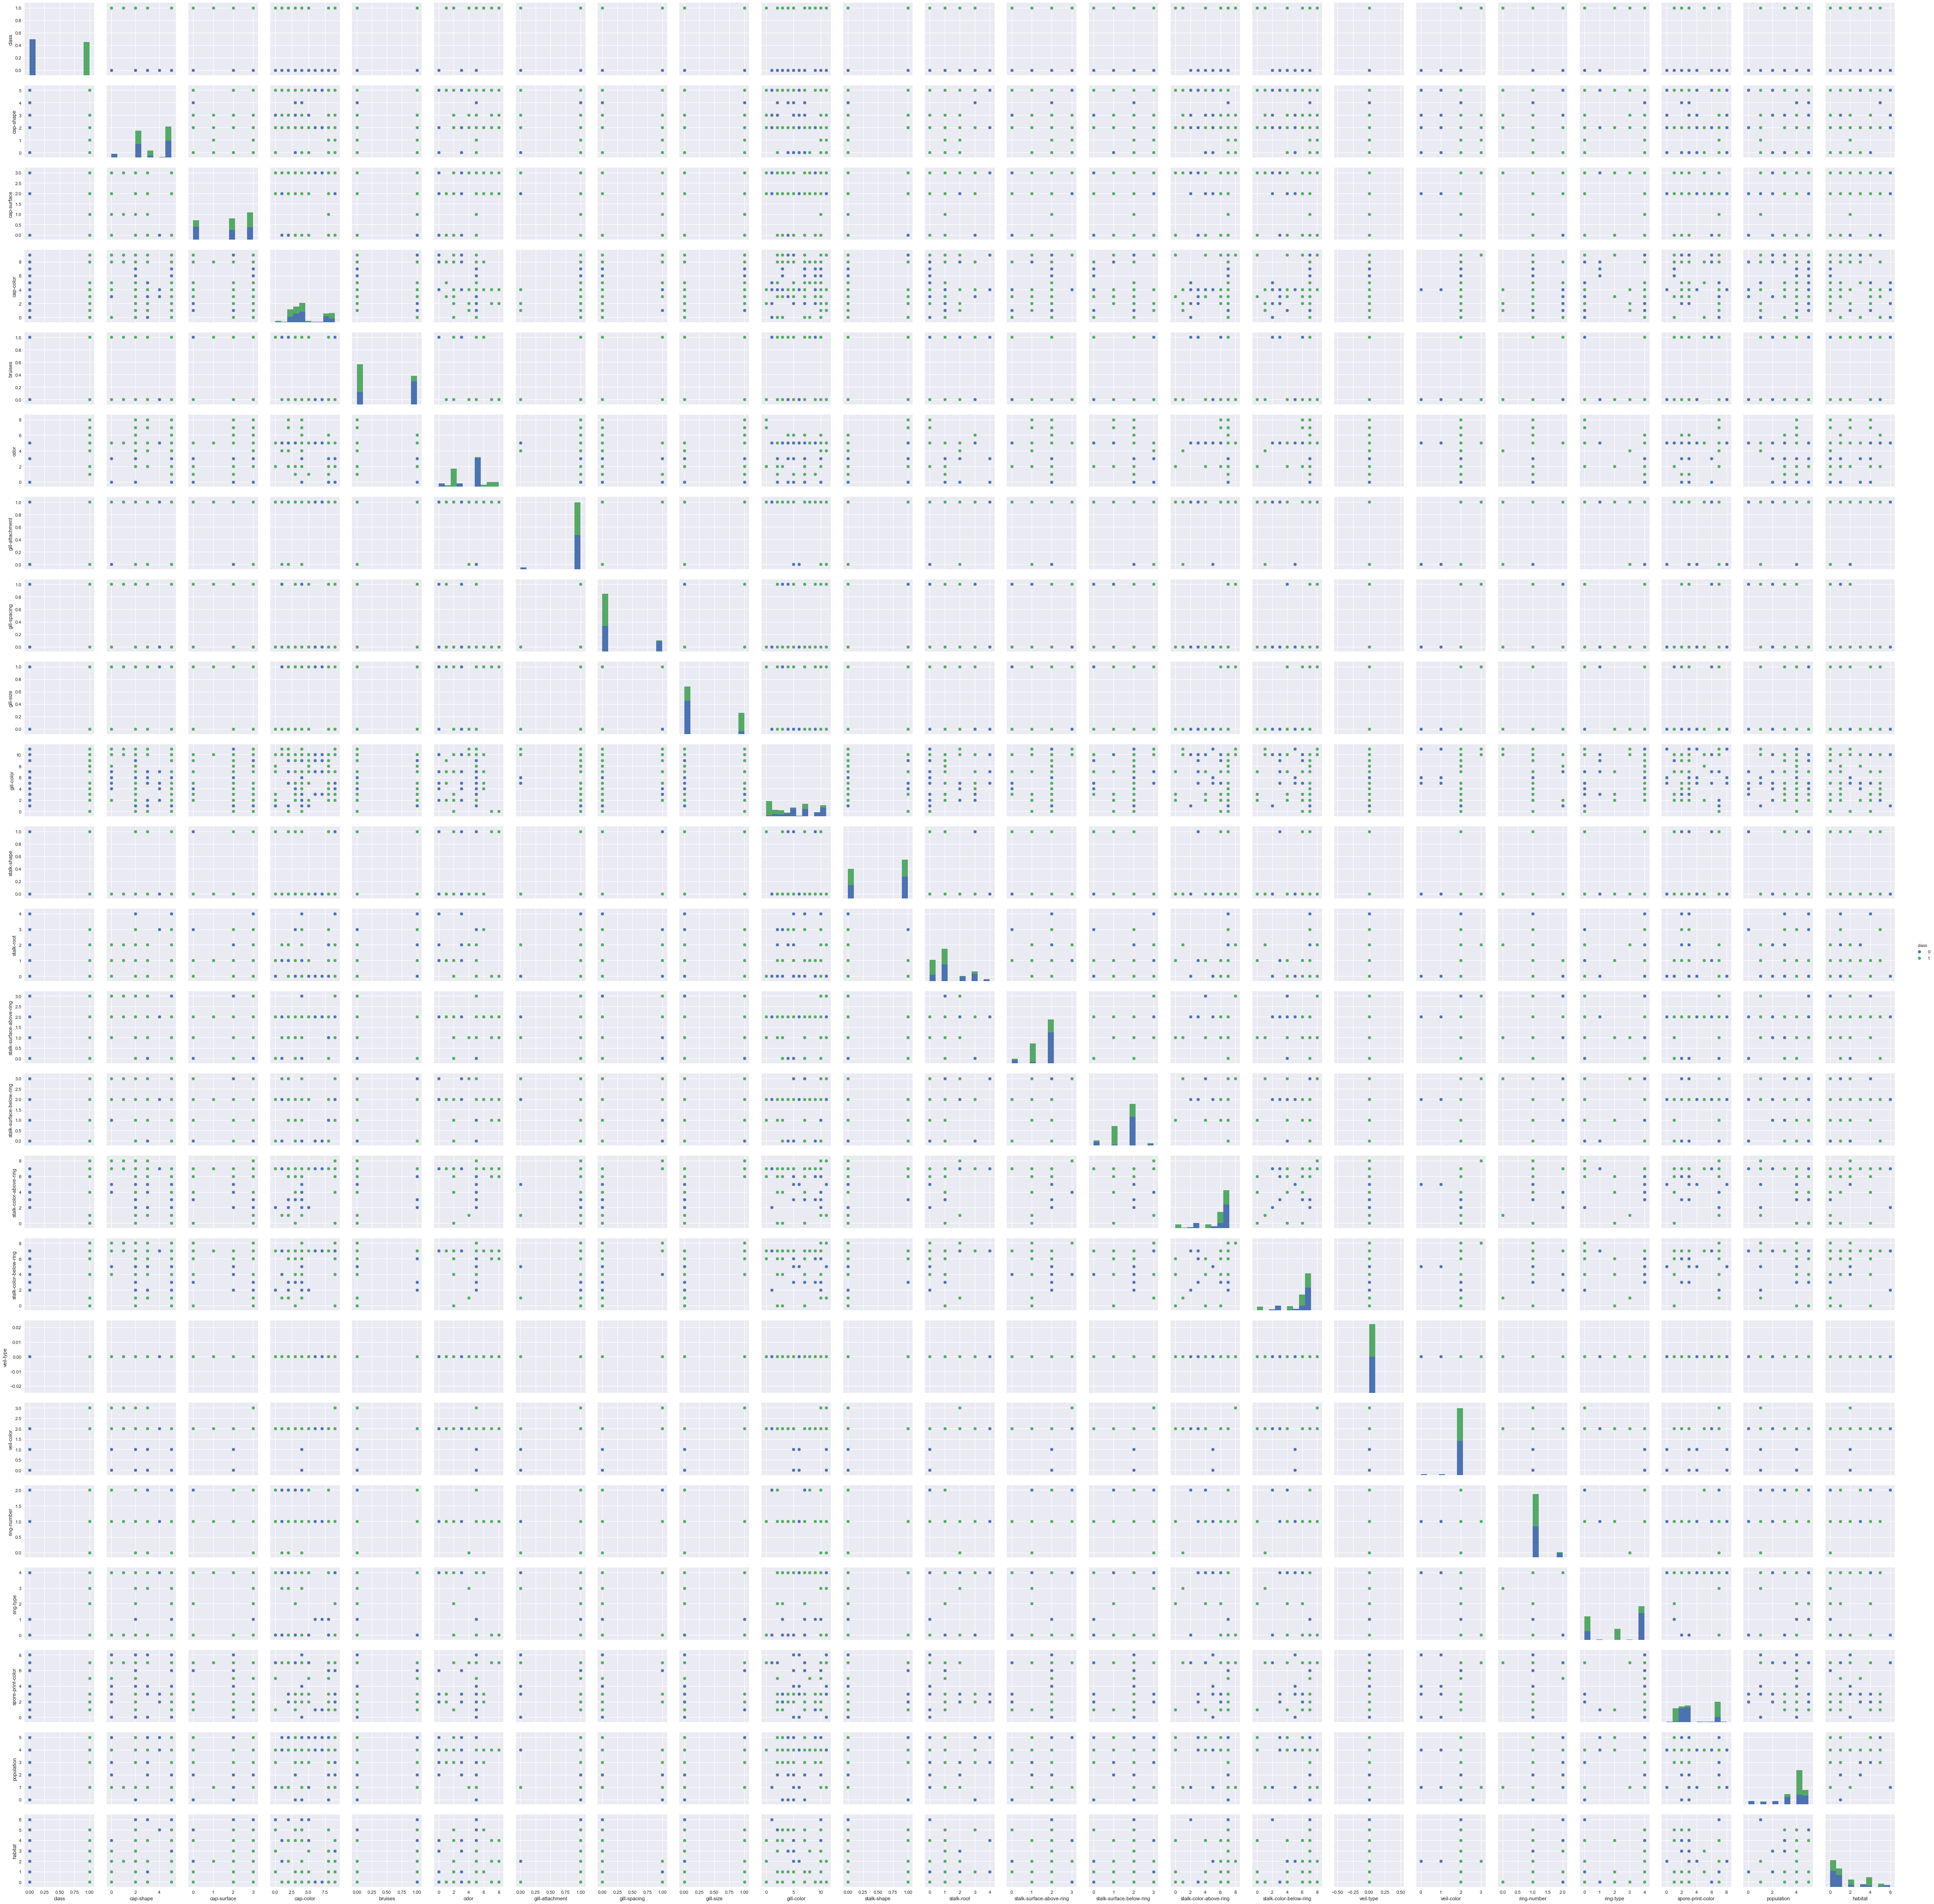

In [206]:
# Pairwise relationships in dataset 
sns.pairplot(transformed_matrix, hue = "class", size = 2.5)

plt.show()

# Double-click on image to maximize

## Distribution of "Edible" Class (Class 0)

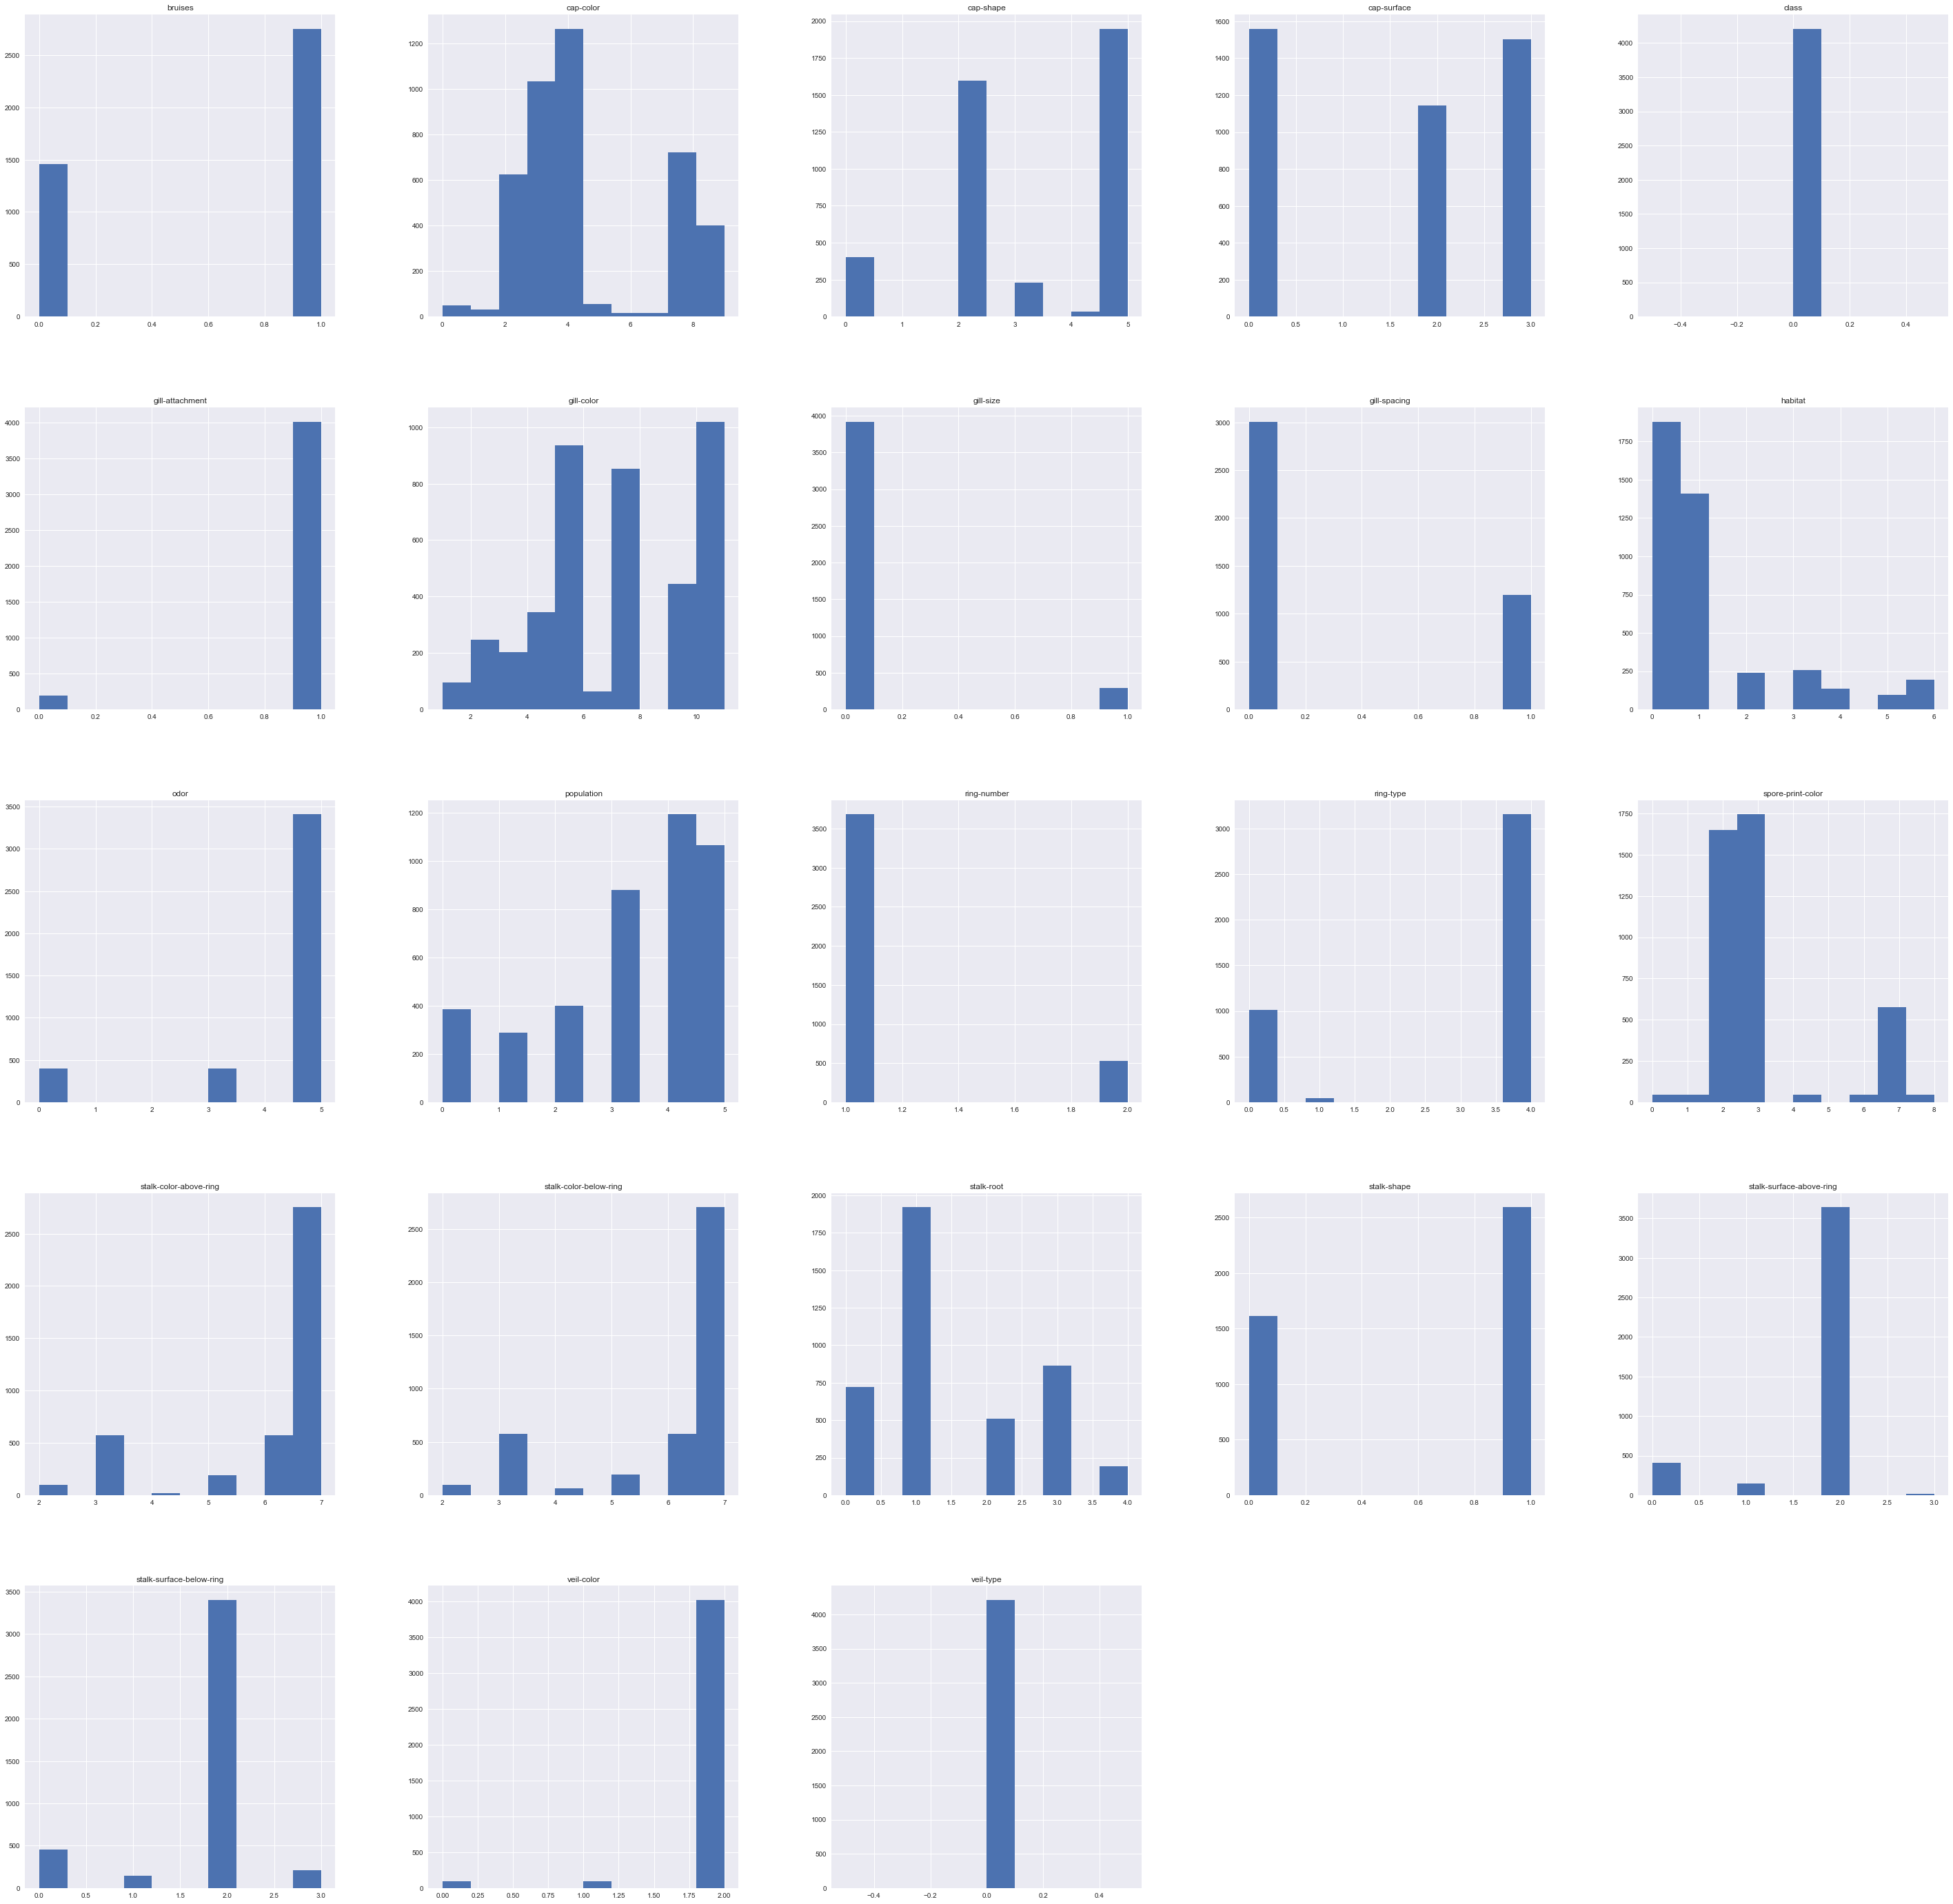

In [207]:
# Distrubtion of edible class

class0.hist()
plt.show()

## Distribution of "Poisonous Class (Class 1)

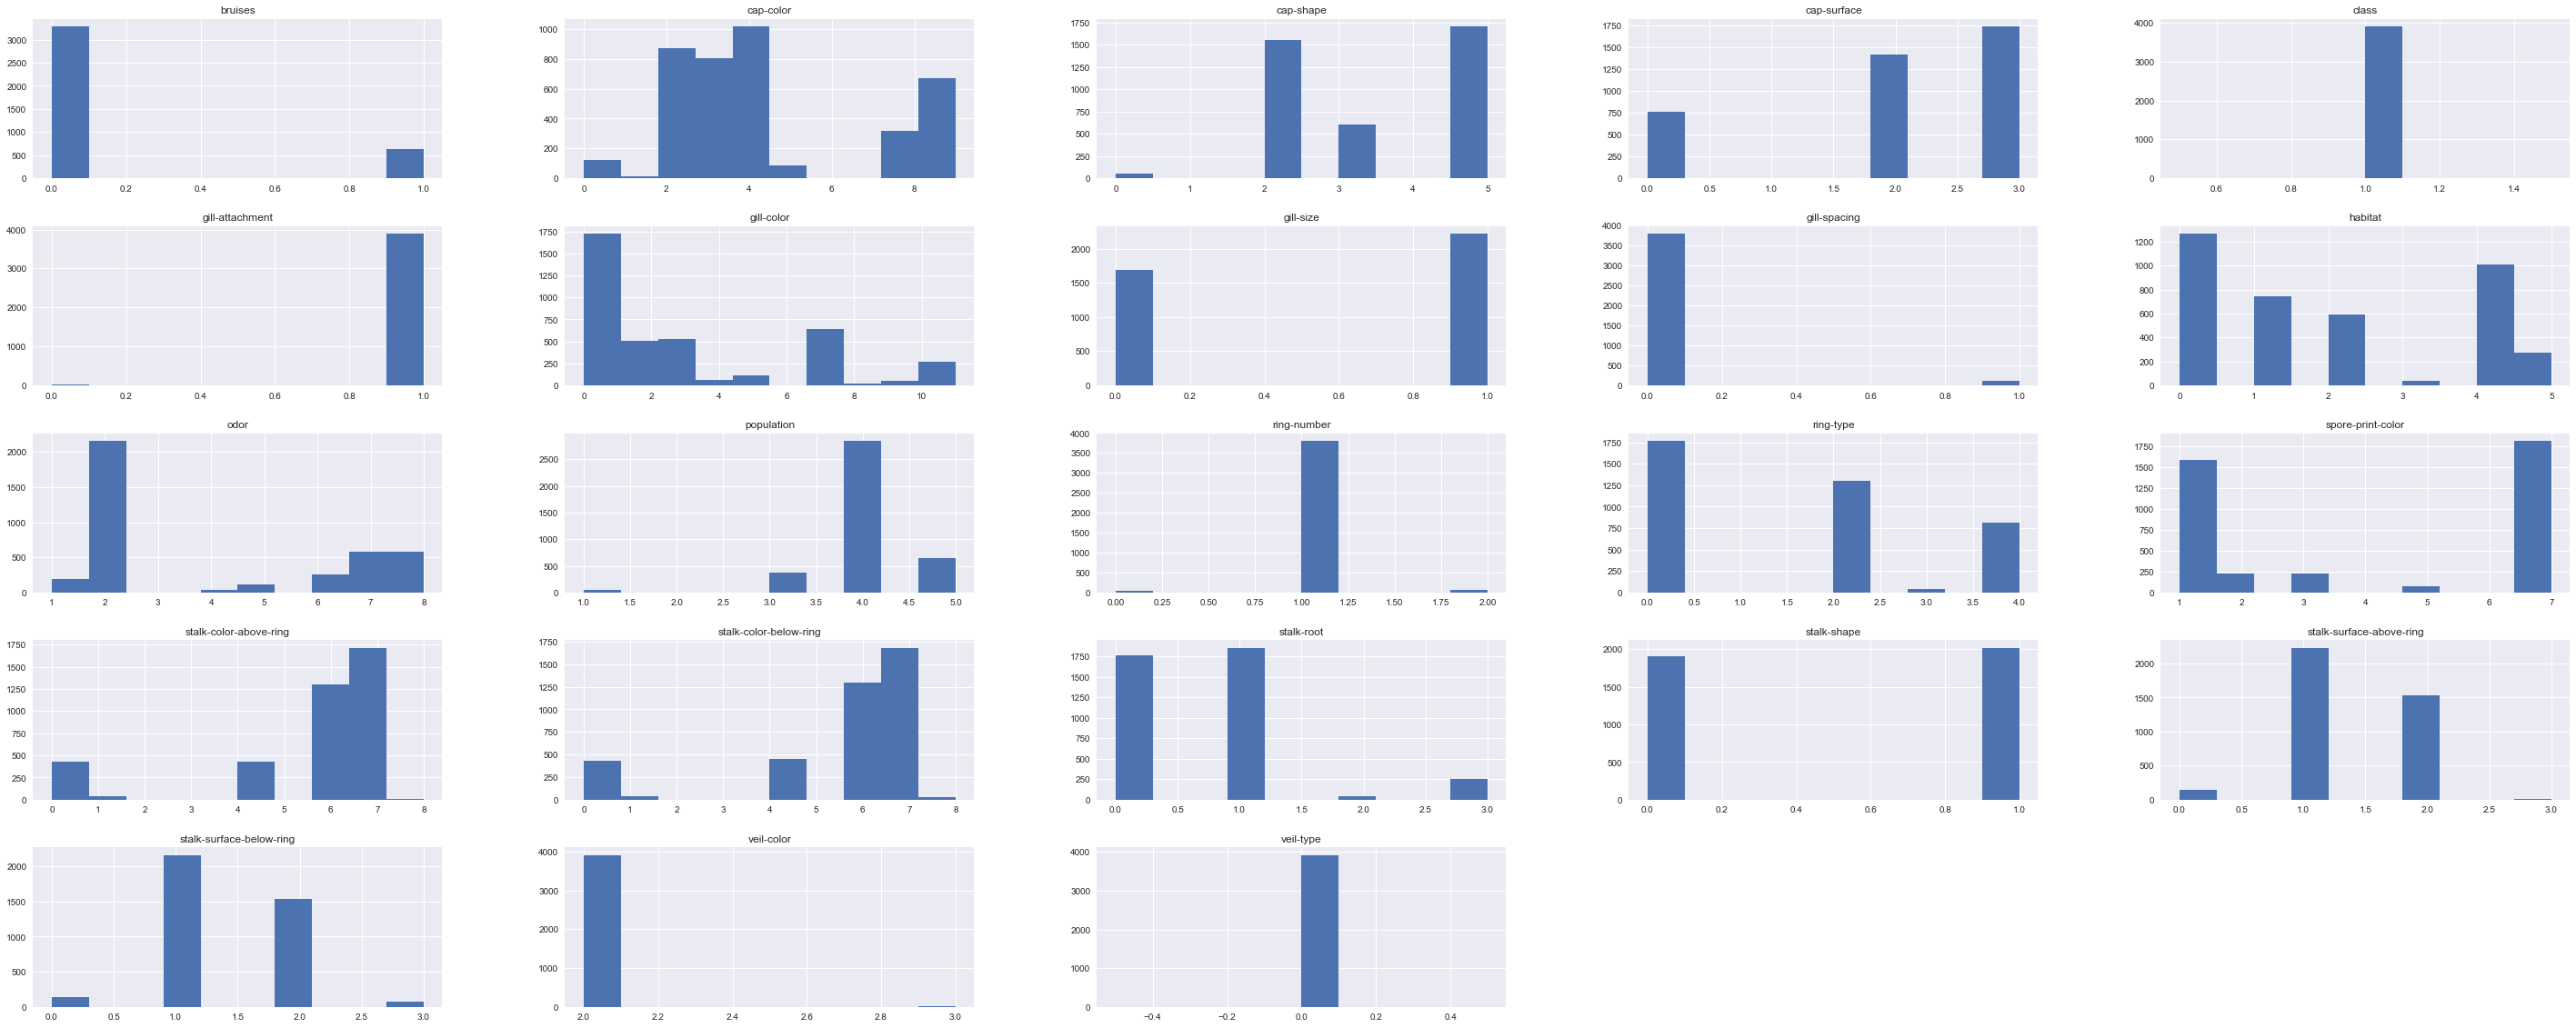

In [43]:
# Distribution of poisonous class 
class1.hist()
plt.show()

## Heatmap: Correlation Matrix of Features

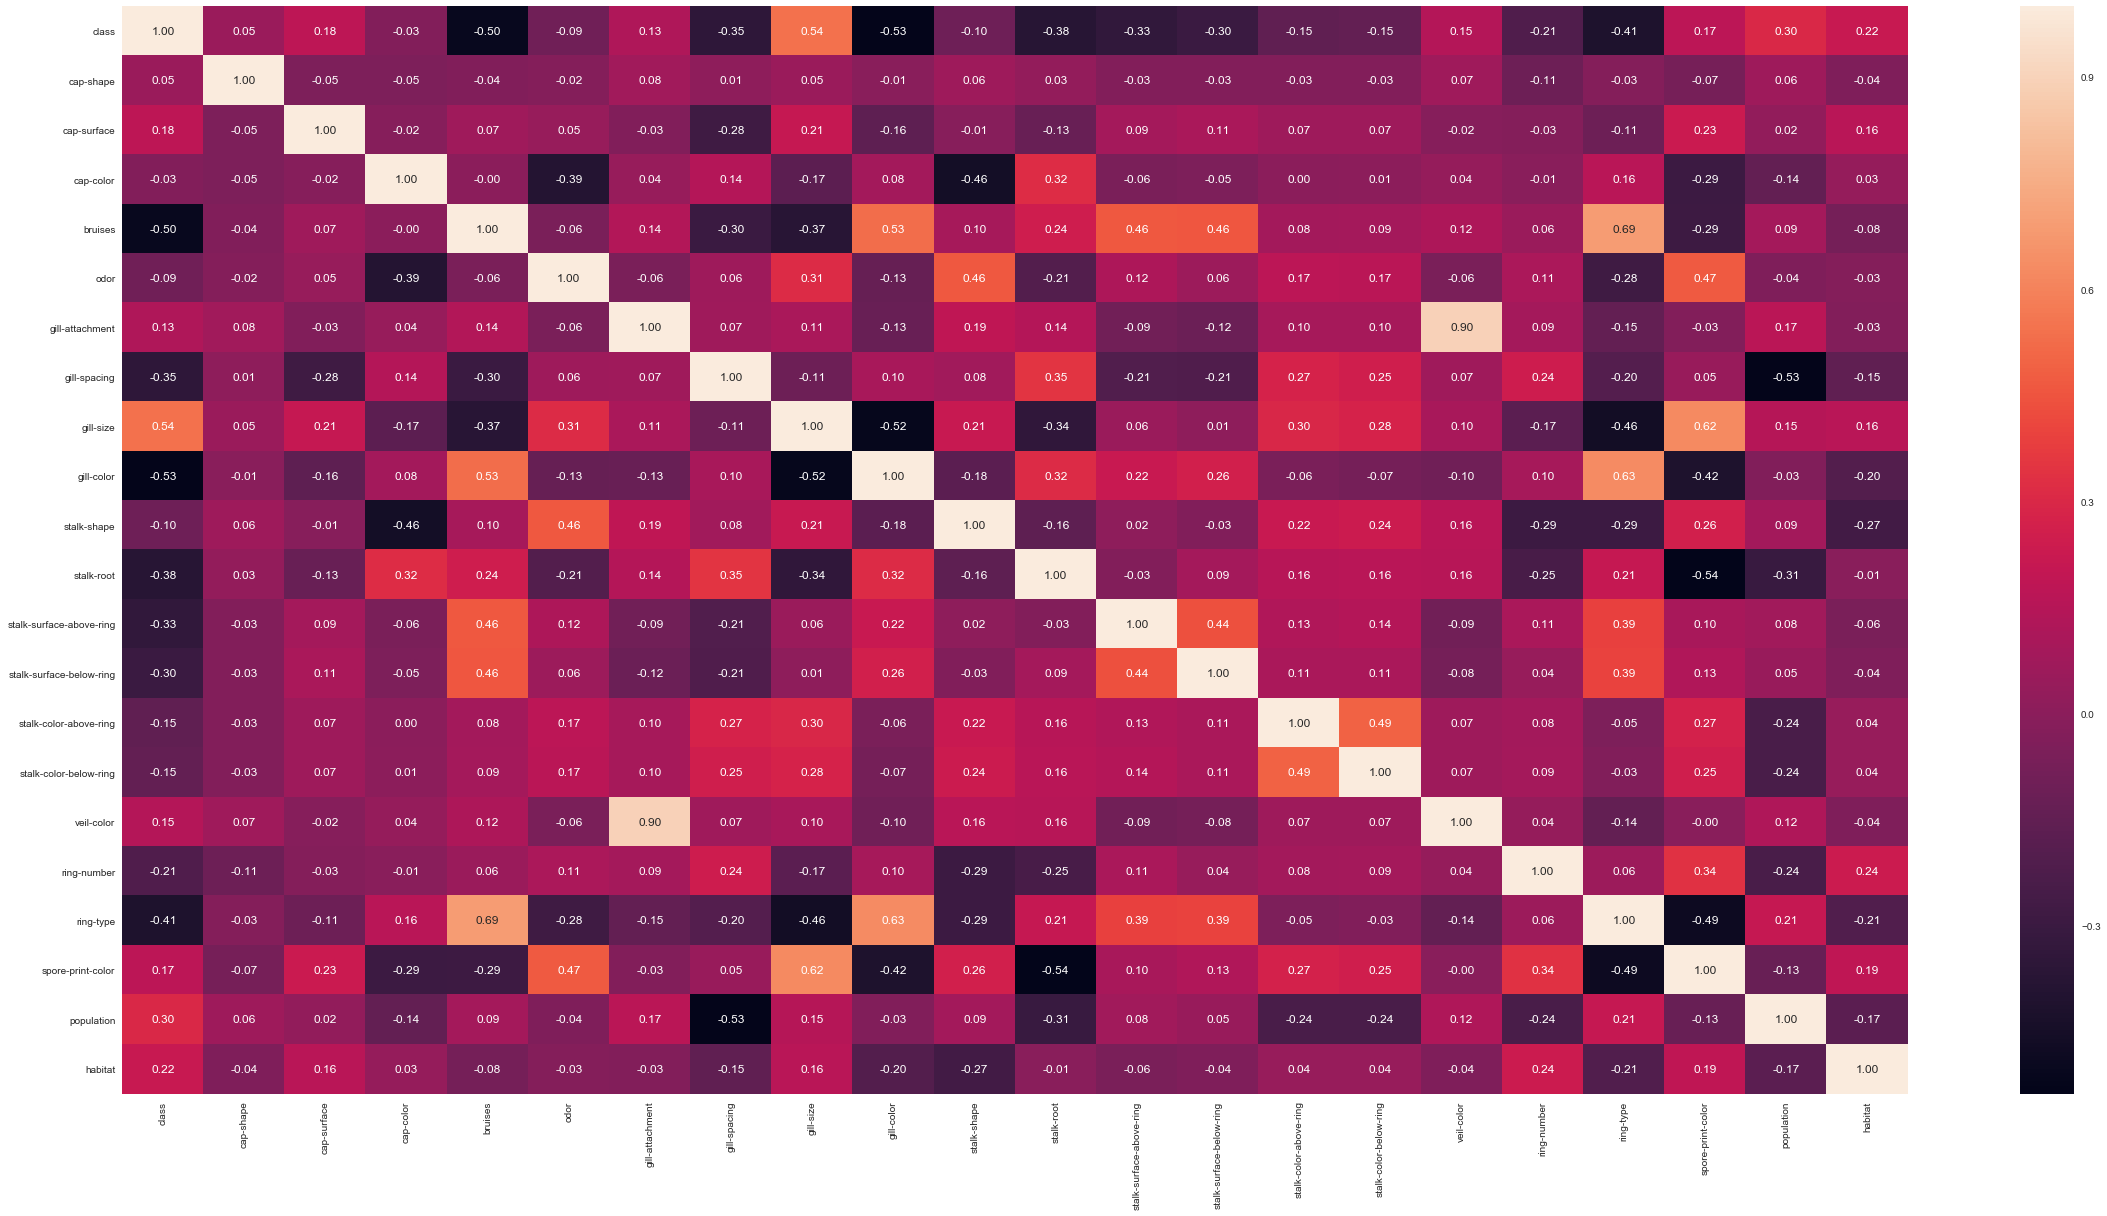

In [36]:
# Plot correlation matrix as heatmap

# Remove the "veil-type" column
t_matrix = transformed_matrix.drop("veil-type", axis = 1) 
sns.heatmap(t_matrix.corr(), annot = True, fmt = "0.2f")


# Get current figure size 
fig_size = plt.rcParams["figure.figsize"] 
# print("Current size: {}".format(fig_size)) 

# New figure size
fig_size[0] = 50
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

plt.show()
# Double click on image to make larger

## Split Data into 70% Training, 30% Testing

In [237]:
# Rename matrix variables for splitting into training and testing sets

X = transformed_matrix.drop("class", axis = 1)
y = transformed_matrix["class"]


In [238]:
# Split data into training and testing set 
from sklearn.model_selection import train_test_split

# Split into 70% training and 30% testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)

print("Training set matrix dimensions: {}".format(X_train.shape))
print("Training set label  dimensions: {}".format(y_train.shape))
print("\n")
print("Testing set matrix dimensions: {}".format(X_test.shape))
print("Testing set label dimensions: {}".format(y_test.shape))

Training set matrix dimensions: (5686, 22)
Training set label  dimensions: (5686,)


Testing set matrix dimensions: (2438, 22)
Testing set label dimensions: (2438,)


## Testing Algorithm 1: K-Nearest Neighbors

### Model 1: KNN, k = 3, distance = minkowski

In [222]:
# Test Algorithm 1: K-Nearest Neighbors (k = 3), Distance = minkowski

from sklearn.neighbors import KNeighborsClassifier

# Instantiate knn learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors = 3)
print("Algorithm: KNN, k = 3, minkowski distance")
print(knn_model)

# Fit the model (learn from training set)
knn_model.fit(X_train, y_train)

# Predict the response on the test set (y predicted)
knn_model_pred = knn_model.predict(X_test)



Algorithm: KNN, k = 3, minkowski distance
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [223]:
# Check shape of y_actual
y_test.shape

(2438,)

In [224]:
# Check shape of y_predicted 
knn_model_pred.shape

(2438,)

### Model 1 Performance: KNN, k = 3, distance = minkowski

In [225]:
# Evaluate Algorithm 1: K-Nearest Neighbors (k = 3), Distance = minkowski

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Evaluate the classification report 
target_names = ["Edible Class", "Poisonous Class"]
print(classification_report(y_test, knn_model_pred, target_names = target_names))
print("\n")

# Evaluate the confusion matrix 
confusion_matrix = confusion_matrix(y_test, knn_model_pred)
print("Confusion matrix \n{}".format(confusion_matrix))
print("\n")
print("TP = ")
print("FP = ")
print("TN = ")
print("FN = ")

# Evaluate the accuracy of the knn model (k = 3)
print("Accuracy {}".format(accuracy_score(y_test, knn_model_pred)))

# Evaluate ROC AUC score
print("ROC AUC Score {}".format(roc_auc_score(y_test, knn_model_pred)))


# Evaluate the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_model_pred, pos_label = 0 )

                 precision    recall  f1-score   support

   Edible Class       1.00      1.00      1.00      1248
Poisonous Class       1.00      1.00      1.00      1190

    avg / total       1.00      1.00      1.00      2438



Confusion matrix 
[[1248    0]
 [   1 1189]]


TP = 
FP = 
TN = 
FN = 
Accuracy 0.9995898277276456
ROC AUC Score 0.9995798319327731


### Model 2: KNN, k = 3, distance = euclidean

In [226]:
# Test Algorithm 1: K-Nearest Neighbors (k = 3), Distance = euclidean

from sklearn.neighbors import KNeighborsClassifier

# Instantiate knn learning model (k = 3)
knn_model2 = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
print("Algorithm: KNN, k = 3, euclidean distance")
print(knn_model2)

# Fit the model (learn from training set)
knn_model2.fit(X_train, y_train)

# Predict the response on the test set (y predicted)
knn_model2_pred = knn_model2.predict(X_test)



Algorithm: KNN, k = 3, euclidean distance
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


### Model 2 Performance: KNN, k = 3, distance = euclidean

In [227]:
# Evaluate Algorithm 1: K-Nearest Neighbors (k = 3), Distance = euclidean

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Evaluate the classification report 
target_names = ["Edible Class", "Poisonous Class"]
print(classification_report(y_test, knn_model2_pred, target_names = target_names))
print("\n")

# Evaluate the confusion matrix 
confusion_matrix = confusion_matrix(y_test, knn_model2_pred)
print("Confusion matrix \n{}".format(confusion_matrix))
print("\n")
print("TP = ")
print("FP = ")
print("TN = ")
print("FN = ")

# Evaluate the accuracy of the knn model (k = 3)
print("Accuracy {}".format(accuracy_score(y_test, knn_model2_pred)))

# Evaluate ROC AUC score
print("ROC AUC Score {}".format(roc_auc_score(y_test, knn_model2_pred)))


# Evaluate the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_model2_pred, pos_label = 0 )

                 precision    recall  f1-score   support

   Edible Class       1.00      1.00      1.00      1248
Poisonous Class       1.00      1.00      1.00      1190

    avg / total       1.00      1.00      1.00      2438



Confusion matrix 
[[1248    0]
 [   1 1189]]


TP = 
FP = 
TN = 
FN = 
Accuracy 0.9995898277276456
ROC AUC Score 0.9995798319327731


## Testing Algorithm 2: Naive Bayes

### Model 1: Gaussian Naive Bayes

In [239]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()


gnb_pred = gaussian_nb.fit(transformed_matrix, transformed_matrix["class"]).predict(transformed_matrix)


### Model 1 Performance: Gaussian Naive Bayes

## Testing other ideas below

### 10-Fold Cross Validation

In [202]:
# 10-fold cross-validation 
# Used to estimate the test error associated with a learning method in order to valuate its performance

from sklearn.model_selection import cross_val_score

# Create list of odd k-values 
k_values = list(range(1,50))
neighbors = filter(lambda x: x % 2 != 0, k_values)

# Create a list for cross validation scores
cross_val_scores = []

# Perform 10-fold cross validation 
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
    cross_val_scores.append(scores.mean())
    

In [217]:
# Determine the misclassificaiton error 
MSE = [1 - x for x in cross_val_scores]

# Find the optimal k for KNN
min_mse = MSE.index(min(MSE))


# Plot the misclassification error and kvalues 
#plt.plot(neighbors, MSE)

### Feature Reduction: Principal Component Analysis

PCA Explained Variance: 
[ 0.33699013  0.16553877  0.12256811  0.06764855  0.05808176  0.05068562
  0.04655507  0.03890229  0.03560675  0.02580663]


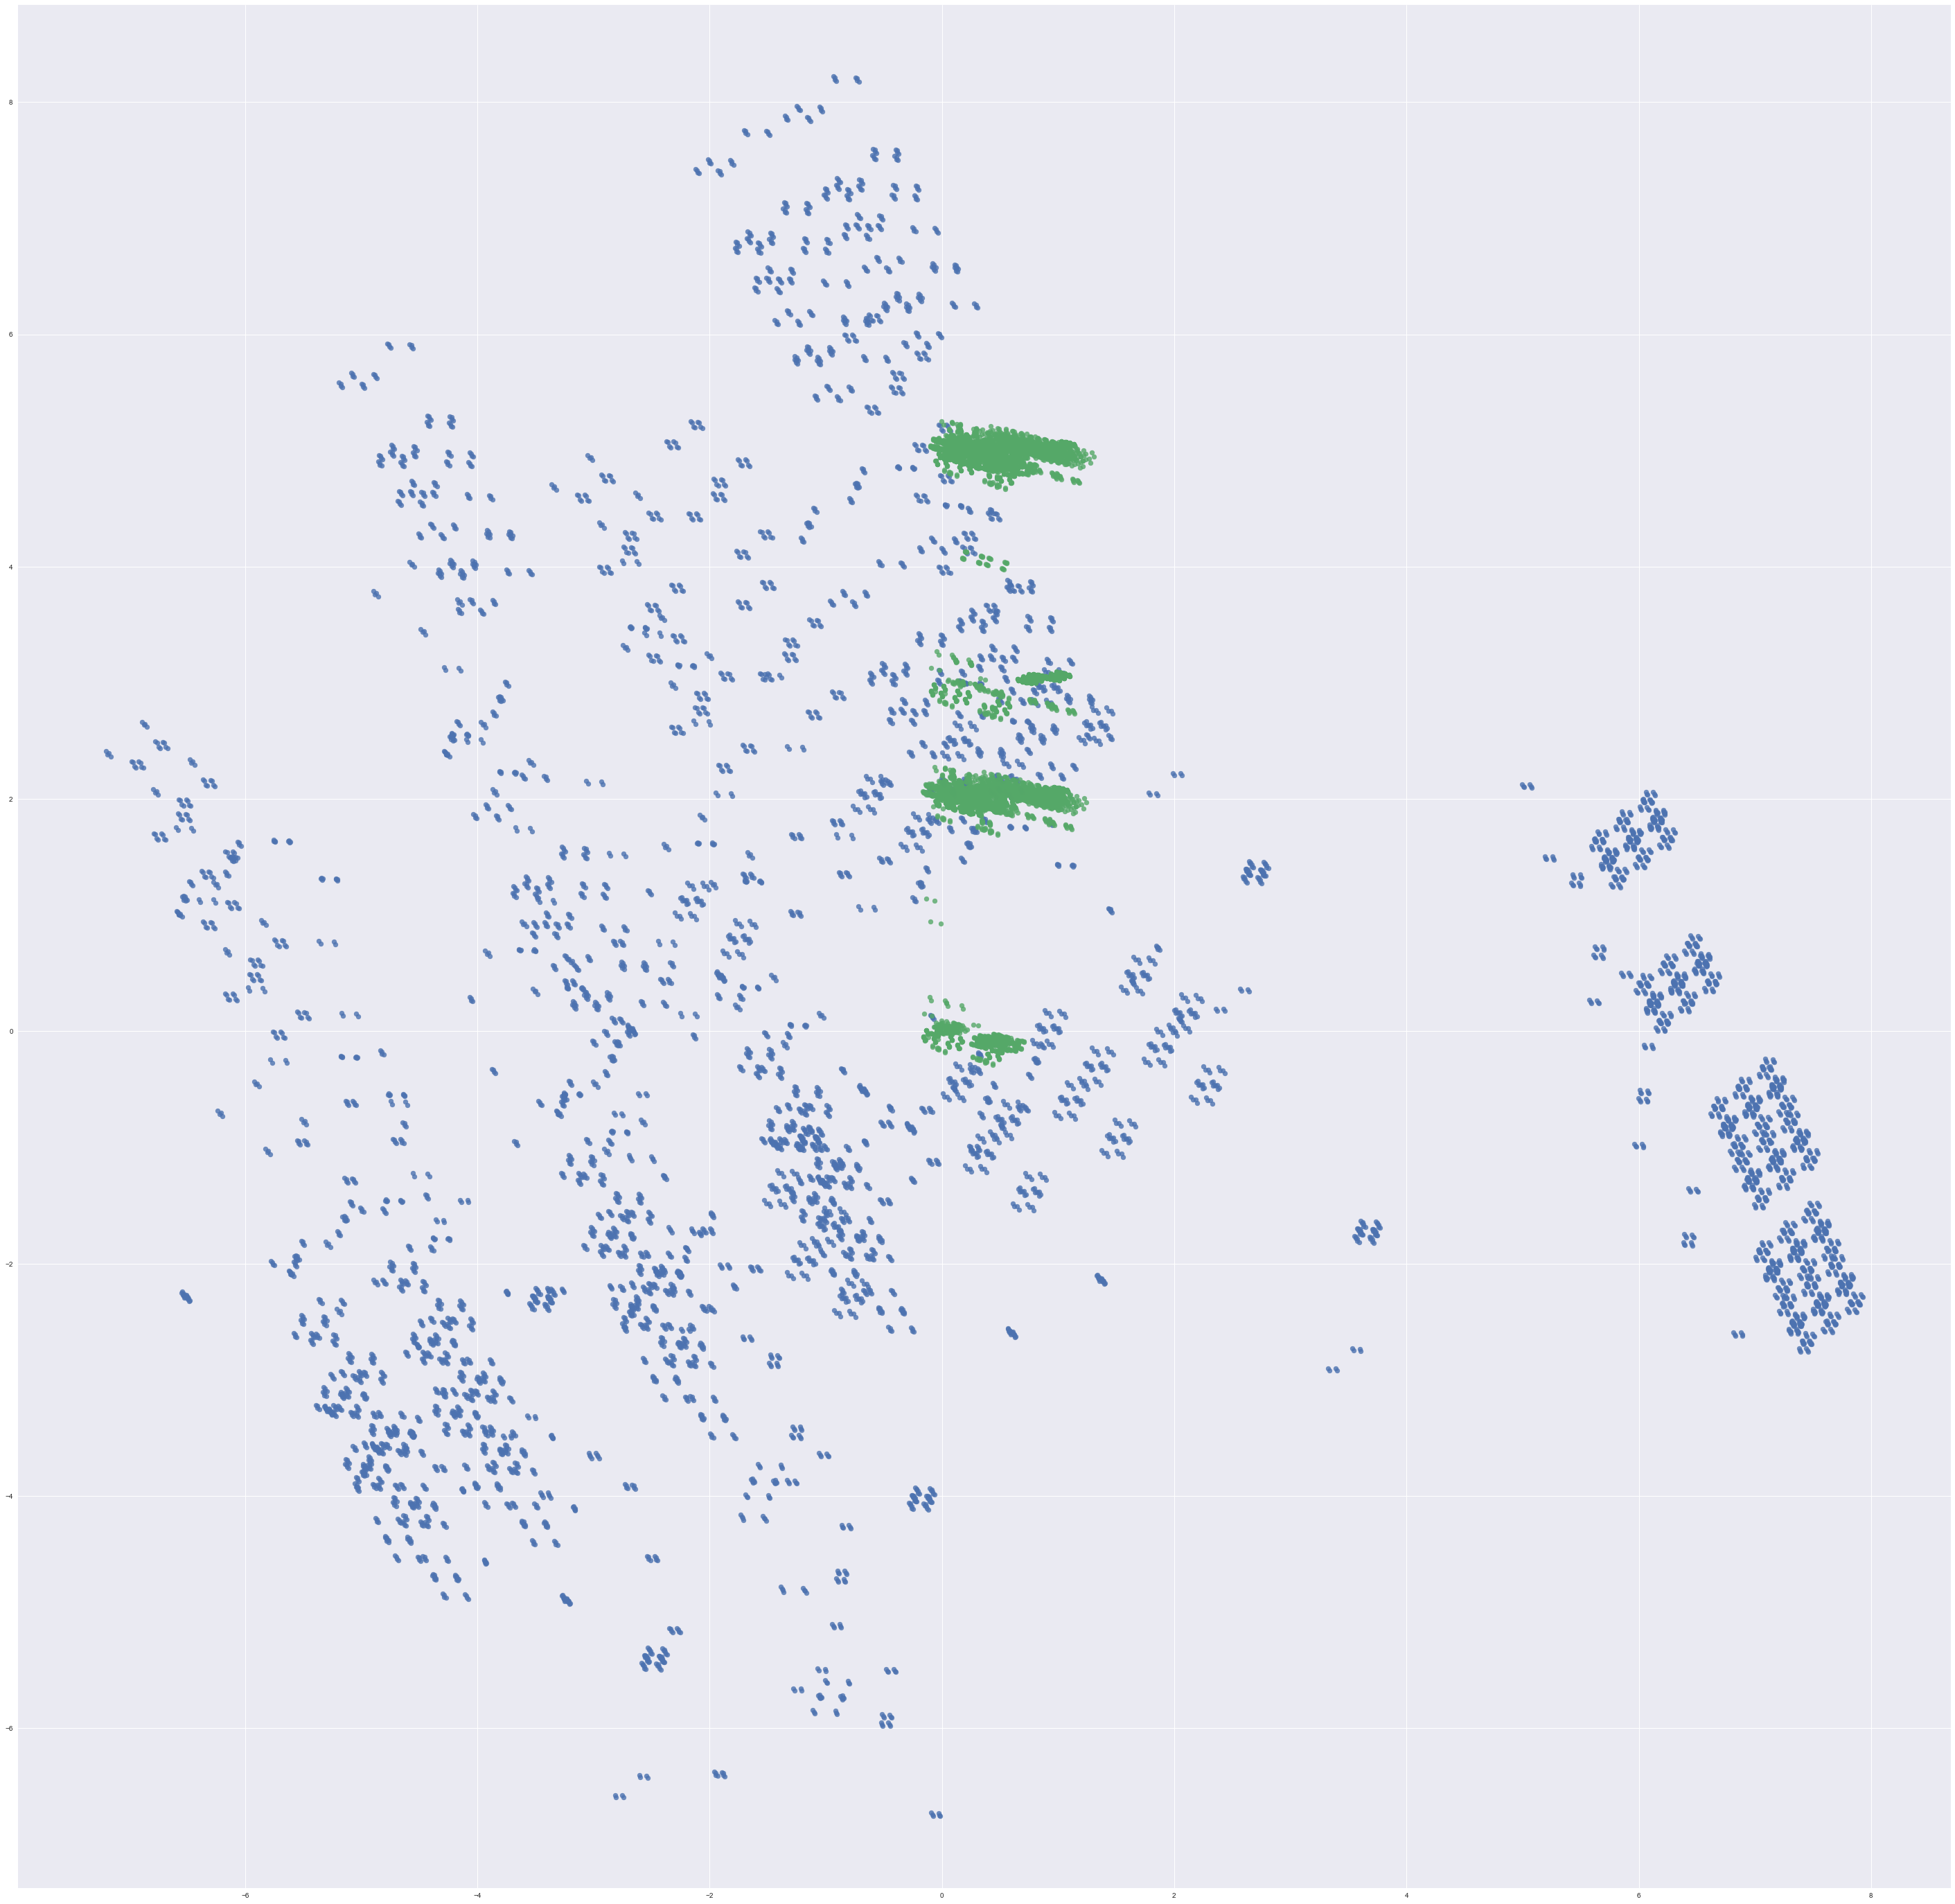

In [178]:
# Test Feature reduction: Principcal Component Analysis (PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(transformed_matrix)
X_transformed_pca = pca.transform(transformed_matrix)
print("PCA Explained Variance: \n{}".format(pca.explained_variance_ratio_))

X_new = pca.inverse_transform(X_transformed_PCA)

plt.scatter(X_transformed_pca[:,0], X_transformed_pca[:, 1], alpha = 0.8)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8)
plt.axis("equal")


# Get current figure size 
fig_size = plt.rcParams["figure.figsize"] 
# print("Current size: {}".format(fig_size)) 

# New figure size
fig_size[0] = 50
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size

plt.show()